In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
def rotate_image(img:np.ndarray, angle:int) -> np.ndarray:
    """
    Rotate the image by theta degrees.
    """
    height, width = img.shape
    img_center = (width//2, height//2)
    M = cv2.getRotationMatrix2D(img_center, angle, 1)
    img_rotated =  cv2.warpAffine(img, M, (width, height)) 
    print(img_rotated.shape)
    return img_rotated

(400, 400)


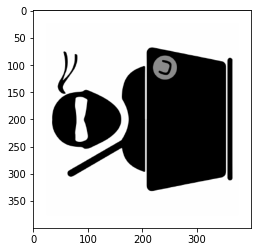

In [17]:
img = cv2.imread("image.png", 0)
plt.imshow(rotate_image(img, 90), cmap = 'gray')
plt.show()

When the image is rotated, the rotation matrix preserves the image shape but some information could be lost. On the places where information is lost, black pixels(0) is added on the image. Sometimes, this might not be what we want. So, here are a few functions that might help.

# To rotate keeping all the information intact and also the aspect ratio.

How? 
1. Calculate the image size after the rotation based on the given angle.
2. Rotate the Image to that same image size using ```cv2.warpAffine()```
3. Resize the image back to its original shape.

$$
Rotation \space Matrix = 
\begin{pmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & -cos(\theta)
\end{pmatrix}
$$


In [27]:
def rotate_image_bound(img, angle):
    height, width = img.shape
    #Numpy uses (y,x) convention but everything else uses (x,y). So it is going to get confusing... ALWAYS!
    img_center = (width//2, height//2)
    rotation_mat = cv2.getRotationMatrix2D(img_center, angle, 1)
        # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - img_center[0]
    rotation_mat[1, 2] += bound_h/2 - img_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_img = cv2.warpAffine(img, rotation_mat, (bound_w, bound_h))
    final_img = cv2.resize(rotated_img, (width, height), cv2.INTER_AREA)
    return final_img
    
    

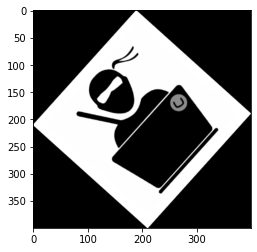

In [30]:
plt.imshow(rotate_image_bound(img, 48), cmap = 'gray')
plt.show()